In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Datasets/4_train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape 

(891, 12)

In [10]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Carter, Master. William Thornton II",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [34]:
null_count = data.isnull().sum()

In [56]:
null_count_df = pd.DataFrame({'Column': null_count.index, 'Null Count': null_count.values})

<AxesSubplot:title={'center':'Null Count per Column'}, xlabel='Column', ylabel='Null Count'>

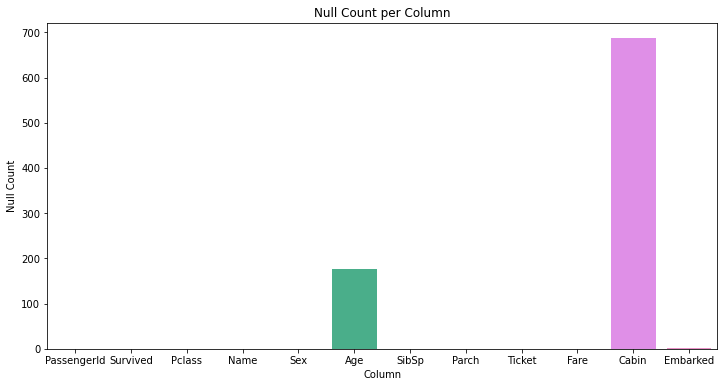

In [54]:
plt.figure(figsize=(12,6))
plt.title('Null Count per Column')
plt.xlabel('Column')
plt.ylabel('Null Count')
sns.barplot(x='Column',y='Null Count',data=null_count_df)

In [67]:
per_mising = data.isnull().sum()*100/len(data)


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [69]:
data.drop('Cabin',axis=1,inplace=True)

In [70]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

First we find out what kind of data embarked contaitns, since it's a categorical variable, we simply can't use the mean. Hence we fill it with mode

In [71]:
data['Embarked'].mode()

0    S
dtype: object

In [72]:
data['Embarked'].fillna('S',inplace=True)

In [79]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [80]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [83]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [84]:
data['Gender']= data['Sex'].map({'male':1,'female':1})

In [92]:
x = data['Sex'].map({'male':1,'female':1})
data.insert(5,'Gender_new',x)
data.drop('Gender',inplace=True,axis=1)

In [93]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.25,S


In the next step we're getting dummies for our Embarked column, which will delete the original column and will get us new columns with dummies 0 or 1. We can delete any one column as we can predict that one based on the other 2 columns.

For eg if 2 are 0, then third will be one and so on.

In [98]:
data1 = pd.get_dummies(data,columns=['Embarked'],drop_first=True)

In [99]:
data1.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.25,0,1


In [102]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

We can always use the countplot of SNS to plot categorical variables, it's a good pratice to see the data contained in the columns though!!

c:\Users\Dell\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

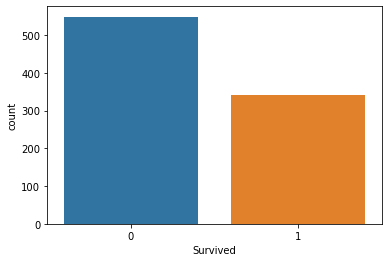

In [105]:
sns.countplot(data['Survived'])

c:\Users\Dell\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

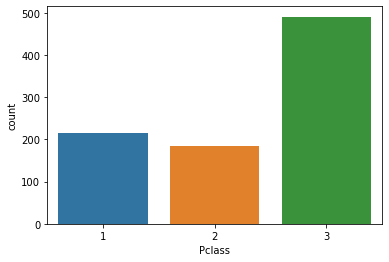

In [106]:
sns.countplot(data['Pclass'])

c:\Users\Dell\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

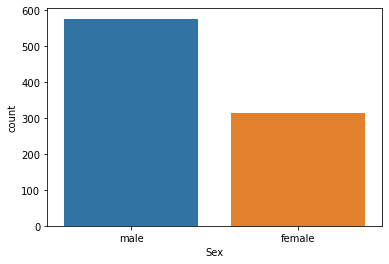

In [107]:
sns.countplot(data['Sex'])

Now we're gonna plot age, which is a numerical column, hence we'll use Hist plot.

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

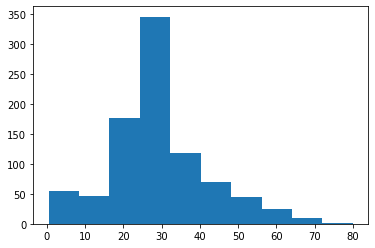

In [108]:
plt.hist(data['Age'])

c:\Users\Dell\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='Age'>

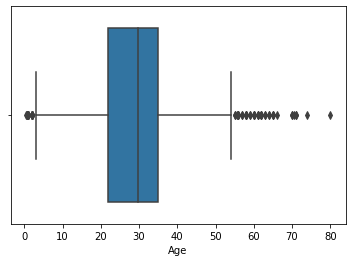

In [120]:
sns.boxplot(data['Age'],orient='v')

In [121]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Gender_new', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

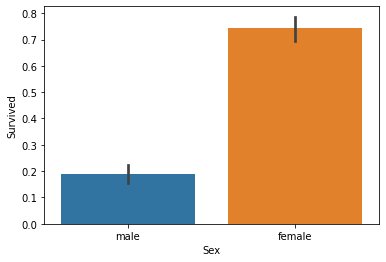

In [122]:
sns.barplot(x='Sex',y='Survived',data=data)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

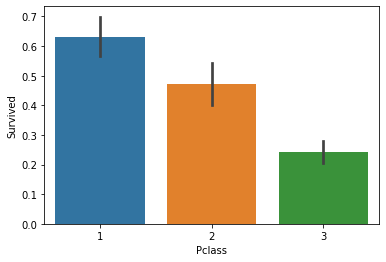

In [123]:
sns.barplot(x='Pclass',y='Survived',data=data)

In [126]:
data['family_Size'] = data['Parch'] + data['SibSp']

In [127]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Embarked,family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.25,S,1
